# Neural network !!!

## What is it?

It is actually the statistic model that is loosely based on our brain. It will look like this:

<img src="img/Section5img/NN.jpeg">

We call each circle unit neuron. A column of neurons is called layers. There are 3 layers in this model. We call the first layer, with black neurons, the input layer. We call the last layer, with green neurons, the output layer. Anything that is not input nor output is called the hidden layer. In this case, there is only one hidden layer, the purple layer.

## Let's look at the inside of neurons.

<img src="img/Section5img/Neuron.jpeg">

There are 2 components in neurons. The first one is called pre-activation. In this part, we multiply each input value with weights, then we add up all of the weight times the input values with the bias value. In the second part, we use the value of the first part as a input for the activation function. The output will be the same, and it will be the input of the next layer.

### Example.

The inputs of the neuron will be 1.1, 2.5 and 3.6 , and the weights will be 3.1, 5.0 and 8.7. Finally, the bias will be 1.1. The activation function will be $x^2$ (This is just an example. I will talk about activation function more. We won't use $x^2$ as our activation function).

The output of the neuron will be:
1. Pre-processing part
 1. Multiply the weights with the input. $ 1.1 * 3.1 , 2.5 * 5.0, 3.6 * 8.7 = 3.41, 12.5, 31.32$
 2. Sum the products of weights and input, then add the bias. $ 3.41 + 12.5 + 31.32 + 1.1 = 48.33$ 
2. Activation function part
 1. We pass the pre-processing part as an input. The output will be $48.33 ^ 2 = 2335.78$
 
### Activation function choices

#### Linear Activation function

$ f(x) = x $

Graph :

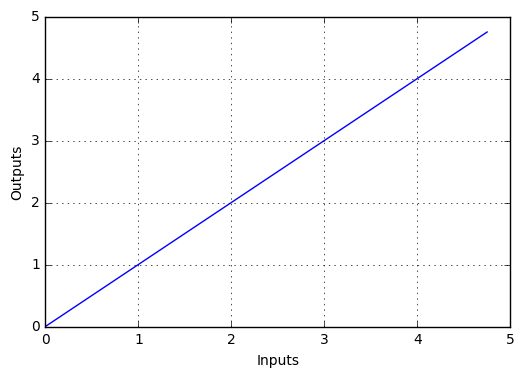

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

# Input of the graph
input_graph = np.arange(0, 5, 0.25)

# Nothing chage in input_graph value.
plt.plot(input_graph, input_graph)

plt.grid()

plt.xlabel('Inputs')
plt.ylabel('Outputs')


#### Sigmoid function

$ f(x) = \frac{1}{1 + e^{-x}} $

e is the constant that is very useful in probability. 
It is around 2.71828182845904523536.

Graph:

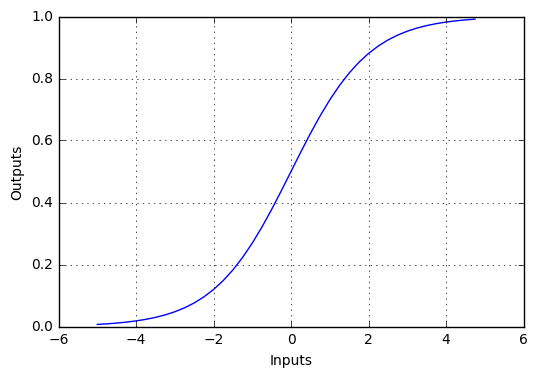

In [2]:
# We have to import math libary. 
import math

input_graph = np.arange(-5, 5, 0.25)

def sigmoid(x):
  return 1 / (1 + math.exp(-x))

# Apply every element in input_graph with sigmoid function
output_graph = list(map(sigmoid, input_graph))

# Plot the graph using input and output
plt.plot(input_graph, output_graph)

plt.grid()

plt.xlabel('Inputs')
plt.ylabel('Outputs')

#### Hyperbolic Tangent

$f(x) = \frac{e^{x} - e^{-x}}{e^{x} + e^{-x}} $

Graph: 

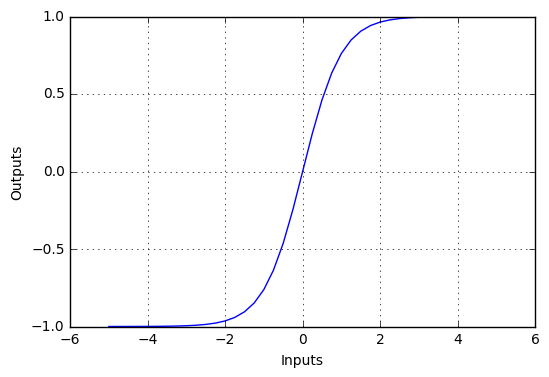

In [3]:
input_graph = np.arange(-5, 5, 0.25)

def tanh(x):
  return (math.exp(x) - math.exp(-x)) / (math.exp(x) + math.exp(-x))

output_graph = list(map(tanh, input_graph))
plt.plot(input_graph, output_graph)

plt.grid()

plt.xlabel('Inputs')
plt.ylabel('Outputs')

#### Ractified Linear Unit

$ f(x) = max(0, x) $

for the smoother version

$ f(x) = ln(1 + e^{x}) $

Graph: 

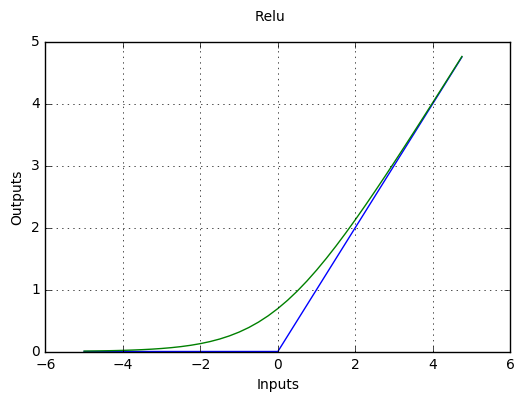

In [4]:
input_graph = np.arange(-5, 5, 0.25)

def Relu(x):
  if x > 0:
    return x
  else:
    return 0

def smoother_Relu(x):
    return math.log(1 + math.exp(x))

output_graph = list(map(Relu, input_graph))
plt.plot(input_graph, output_graph)

plt.grid()

plt.suptitle('Relu')
plt.xlabel('Inputs')
plt.ylabel('Outputs')

output_graph2 = list(map(smoother_Relu, input_graph))
plt.plot(input_graph, output_graph2)

The green one is the smoother one.

### How we can make this "learn" ?

Neural network is usually asociated with supervised learning (see section 1), so we will try to find the best weights and biases to fit the dataset and label. We may uses genetic algorithm to find the best weight, but there is a better way. We call it a "Gradient descent".

### Basics concept.

I will show you how we can use gradient descent to find the optimal value for weight and bias in only one neuron. For multiple layers of neuron, I suggest you to watch [this series](https://www.youtube.com/playlist?list=PLiaHhY2iBX9hdHaRr6b7XevZtgZRa1PoU).

### What we are going to do (Linear regression)? 

I think the best way to start is to introduce the dataset. 

We are going to create our own data set by defining the answer then distort it similarly, to genetic algorithm example. 

The answer to our problem is $ y = 3x + 4 $. We will then distort it and use our learning algorithm to find the answer.

### Distort the data

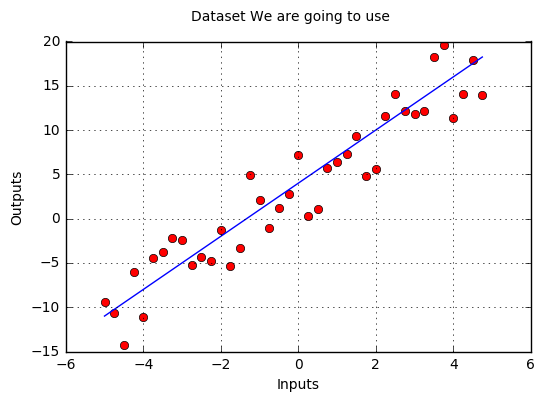

In [5]:
# Get the input data
# In order to distort the data, we have to add randomness to it
import random

input_graph = np.arange(-5, 5, 0.25)

def output(input_graph):
    # This is the normal output of the graph.
    normal_out = 3*input_graph + 4
    # Adding noise to it by adding or subtracting by random number
    return normal_out + random.uniform(-5, 5)

def real_output(input_graph):
    return  3*input_graph + 4

output_graph = list(map(output, input_graph))
real_output_graph = list(map(real_output, input_graph))

plt.plot(input_graph, output_graph, 'ro')
plt.plot(input_graph, real_output_graph)

plt.suptitle('Dataset We are going to use')
plt.grid()
plt.xlabel('Inputs')
plt.ylabel('Outputs')

The blue line is the line of best-fit (answer).

The training set will be the coordinate of red dots.  

### Looking the at the neuron. 

<img src="img/Section5img/Linear.jpeg">

The input will be X and the output will be Y. Then we will have to get the best solution for weight and bias. 

### How do you know that out weight and bias is correct?

I will introduce the cost function. This cost funtion will give us the error of our neural network compares to the real dataset. 

### Introduce the mean square error.

The error will be $$E(x) = \frac{1}{2m} * \sum_{i=1}^{m} (h(x^{(i)}) - y^{(i)})^2$$

m is the number of training sets (number of points)

What $h(x^{(i)})$ is our neural output and $y^{(i)}$ is the correct output. What this error function did is to get the sum of all the differences between our neural network output and the real output and divides it by the number of training set. What we have to do now is to tweek the value of w and b in our neuron to get the smallest error.

The output of the neuron is $ h(x^{(i)}) = W*x^{(i)} + b $ So the error function in term of W and b will be 

$$E(x) = \frac{1}{2m} * \sum_{i=1}^{m} (W*x^{(i)} + b - y^{(i)})^2$$

### How do we find the lowest error?

We are going to use calculus to help us. Can you remember when we do derivatives? We can find the lowest point by finding the point where the slope is zero. We will use similar method. Since we can't program the computer to take the derivative and solve the equation, we will use the slope of the point as a guide to the lowest point.

#### How?

First we are going to just pick the weight randonly and bias and calulate the error. There must be a relationship between error and bias and weight. To make everything simple I will consider weight as just the only influence in the error. Then after that, we can apply the same principle to bias. 

Consider this graph:

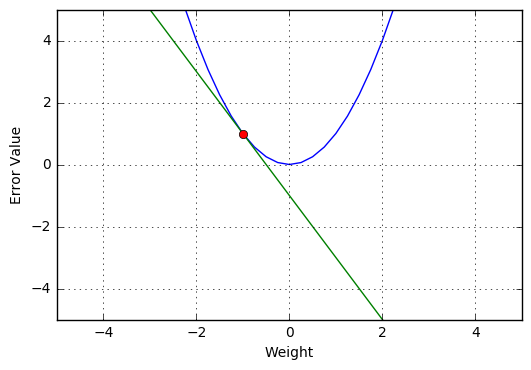

In [6]:
# For Minimum point
input_graph = np.arange(-5, 5, 0.25)

# Using Lambda 
# This is just an example
function = lambda x : x**2

# Calulate the tagent line by hand
tangent_line_1 = lambda x : -2*x - 1

# Plot the graph
plt.plot(input_graph, function(input_graph))
plt.plot(input_graph, tangent_line_1(input_graph))

# The point of intersection.
plt.plot([-1],[1], 'ro')

plt.grid()

plt.xlabel('Weight')
plt.ylabel('Error Value')

plt.axis([-5, 5, -5, 5])
plt.show()

The slope of this point is negative. In order to move to the lowest point we have to move the right handside. In other words, we have to increase the X value.

Same as this: 

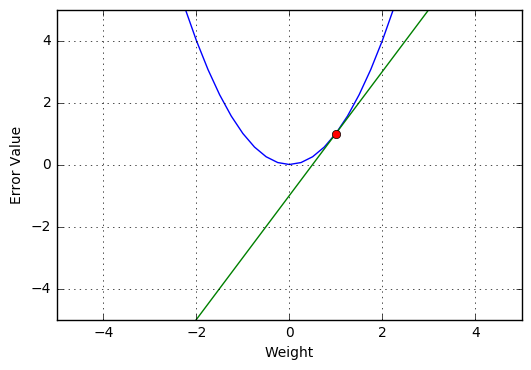

In [8]:
# For Minimum point
input_graph = np.arange(-5, 5, 0.25)

# Using Lambda
# This is just an example
function = lambda x : x**2

# Calulate the tagent line by hand
tangent_line_1 = lambda x : 2*x - 1

# Plot the graph
plt.plot(input_graph, function(input_graph))
plt.plot(input_graph, tangent_line_1(input_graph))

# The point of intersection.
plt.plot([1],[1], 'ro')

plt.grid()

plt.xlabel('Weight')
plt.ylabel('Error Value')

plt.axis([-5, 5, -5, 5])
plt.show()

The slope of this point is positive. In order to move to the lowest point, we have to move to the left handside. In  other words, we have to decrese the X value.

As you can see, the slope of the point is always opposite to the direction that leads us to the lowest point.
We exploit this fact and use it as an learning algorithm.

### Gradient descent

Now we can update the weight by minus it with the slope of the graph $ * \eta $

### What is $\eta$ ? 

We call it a learning rate. Since sometimes the slope can be very high causing the new weight to be moving a lot, this causes longer time to learn or the solution will diverge. But if the learning rate is too small, our learning alogrithm won't work well because the weight will be moving too slow. 

Here is the new equation :

$$ Weight \leftarrow Weight + \eta * \frac{\partial}{\partial W} \frac{1}{2m} * \sum_{i=1}^{m} (W*x^{(i)} + b - y^{(i)})^2 $$

and 

$$ Bias \leftarrow Bias + \eta * \frac{\partial}{\partial b} \frac{1}{2m} * \sum_{i=1}^{m} (W*x^{(i)} + b - y^{(i)})^2 $$

$\leftarrow$ is assigment operation just like $ = $ in python.

### Let's differentiate the cost function.

We have to find this: $$\frac{\partial}{\partial W} \frac{1}{2m} * \sum_{i=1}^{m} (W*x^{(i)} + b - y^{(i)})^2$$

Since sigma is just a sum, we can use the sum rule of differentiation.

$$ \frac{1}{2m} * \sum_{i=1}^{m} \frac{\partial}{\partial W} (W*x^{(i)} + b - y^{(i)})^2 $$

Then we are going to use the chain rule:

$$ \frac{1}{2m} * \sum_{i=1}^{m} \frac{\partial (W*x^{(i)} + b - y^{(i)})^2}{\partial (W*x^{(i)} + b - y^{(i)})} * \frac{\partial{(W*x^{(i)} + b - y^{(i)})}}{\partial W}  $$

Since b and $y^{(i)}$ don't have any association with W, the differentiation will be zero and $\frac{\partial}{\partial W}$ of $ W*x^{(i)} $ is $x^{(i)}$.

And 

$$\frac{\partial (W*x^{(i)} + b - y^{(i)})^2}{\partial (W*x^{(i)} + b - y^{(i)})} = 2*(W*x^{(i)} + b - y^{(i)})$$
 
So $$\frac{\partial E(x)}{\partial W} = \frac{1}{2m} * \sum_{i=1}^{m} x^{(i)} * 2*(W*x^{(i)} + b - y^{(i)}) $$

$$\frac{\partial E(x)}{\partial W} = \frac{1}{m} * \sum_{i=1}^{m} x^{(i)} * (W*x^{(i)} + b - y^{(i)}) $$


For: $$\frac{\partial}{\partial b} \frac{1}{2m} * \sum_{i=1}^{m} (W*x^{(i)} + b - y^{(i)})^2$$

We will us the chain rule again.

$$ \frac{1}{2m} * \sum_{i=1}^{m} \frac{\partial (W*x^{(i)} + b - y^{(i)})^2}{\partial (W*x^{(i)} + b - y^{(i)})} * \frac{\partial (W*x^{(i)} + b - y^{(i)})}{\partial b} $$

Since W and $y^{(i)}$don't have any association with d, the differentiation will be zero and $\frac{\partial}{\partial b}$ of $ b $ is 1.

And, $$\frac{\partial (W*x^{(i)} + b - y^{(i)})^2}{\partial (W*x^{(i)} + b - y^{(i)})} = 2*(W*x^{(i)} + b - y^{(i)})$$

now we get $$\frac{\partial E(x)}{\partial b} = \frac{1}{2m} * \sum_{i=1}^{m} * 2*(W*x^{(i)} + b - y^{(i)})$$ 

Or

$$\frac{\partial E(x)}{\partial b} = \frac{1}{m} * \sum_{i=1}^{m}*(W*x^{(i)} + b - y^{(i)})$$ 

### So now we get this full training formula

$$ Weight \leftarrow Weight + \eta * \frac{1}{m} * \sum_{i=1}^{m} x^{(i)} * (W*x^{(i)} + b - y^{(i)}) $$

and 

$$ Bias \leftarrow Bias + \eta * \frac{1}{m} * \sum_{i=1}^{m}*(W*x^{(i)} + b - y^{(i)}) $$


### Introduction to matrix

Since we are dealing with very big sets of numbers, it would be much easier to save the data in the matrix.The matrix is just like a list but it can contain more data. 

Here is example of 1-D matrix with length of n:

\begin{bmatrix}
    x_{1} & x_{2} & x_{3} & \dots & x_{n} 
\end{bmatrix}

2-D matrix:

\begin{bmatrix}
    x_{11} & x_{12} & x_{13} & \dots  & x_{1n} \\
    x_{21} & x_{22} & x_{23} & \dots  & x_{2n} \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    x_{m1} & x_{m2} & x_{m3} & \dots  & x_{mn} \\
\end{bmatrix}

The matrix dimension is the number of row and number of column in the matrix. We call this matrix $M x N$ (M columns and N rows)

The operator of the matrix will be only $ + and -$. When we add the matrix together, the dimension of the matrix must be the same. 

Adding matrix together:

\begin{bmatrix} 1 & 2 & 3 \\ 4 & 5 & 6 \\ 7 & 8 & 9 \\ \end{bmatrix} 

$$ + $$

\begin{bmatrix} 1 & 2 & 3 \\ 4 & 5 & 6 \\ 7 & 8 & 9 \\ \end{bmatrix}

$$ = $$

\begin{bmatrix} 2 & 4 & 6 \\ 8 & 10 & 12 \\ 14 & 16 & 18 \\ \end{bmatrix}

This will be the same as minus.

Multiply the matrix with numbers:

\begin{bmatrix} 1 & 2 & 3 \\ 4 & 5 & 6 \\ 7 & 8 & 9 \\ \end{bmatrix} 

$$ \times $$

$$ 10 $$

$$ = $$

\begin{bmatrix} 10 & 20 & 30 \\ 40 & 50 & 60 \\ 70 & 80 & 90 \\ \end{bmatrix} 

Multiply the matrix with the matrix (Rule: the number of rows of the first matrix must be equal to the number of columns in the second matrix):

\begin{bmatrix} 1 & 2 & 3 \\ 4 & 5 & 6  \end{bmatrix} 

$$ \times $$

\begin{bmatrix} 1 & 2  \\ 3 & 4 \\ 5 & 6  \end{bmatrix} 

$$ = $$

\begin{bmatrix} (1 \times 1) + (2 \times 3) + (3 \times 5) & (1 \times 2) + (2 \times 4) + (3 \times 6)  \\ (4 \times 1) + (5 \times 3) + (6 \times 5) & (4 \times 2) + (5 \times 4) + (6 \times 6)   \end{bmatrix} 

$$ = $$

\begin{bmatrix} 22 & 28 \\ 49 & 64   \end{bmatrix} 

### Matrix in python

In [9]:
# This is the libary we will use for matrix.
import numpy as np

# Create matrix
num_mat_1 = np.array([[1,2,3],[4,5,6],[7,8,9]])
num_mat_2 = np.array([[1,2,3],[4,5,6],[7,8,9]])

# Adding the matrix together

adding_matrix = num_mat_1 + num_mat_2

# Print out the matrix
print(adding_matrix)

[[ 2  4  6]
 [ 8 10 12]
 [14 16 18]]


In [10]:
# Multiply The matrix together.

num_mat_1 = np.array([[1,2,3],[4,5,6]])
num_mat_2 = np.array([[1,2],[3,4],[5,6]])

mul_matrix = np.dot(num_mat_1, num_mat_2)
print(mul_matrix)

[[22 28]
 [49 64]]


In [11]:
# Multiply The matrix with number.

num_mat_1 = np.array([[1,2,3],[4,5,6],[7,8,9]])

# Times 10
mul_matrix = num_mat_1 * 10
print(mul_matrix)

[[10 20 30]
 [40 50 60]
 [70 80 90]]


### Lets start Coding

Weight: 8.879313672409527
Bias: 5.701787241648244


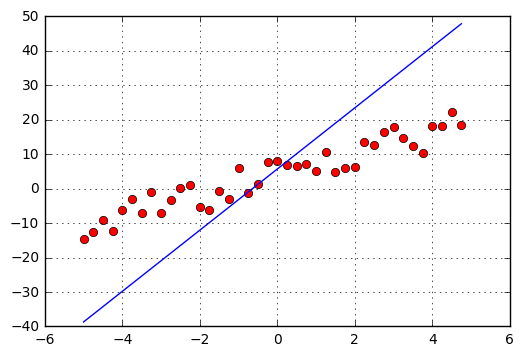

In [12]:
# Copy some of the cod from above
import random

X = np.arange(-5, 5, 0.25)

def output(input_graph):
    # This is the normal output of the graph.
    normal_out = 3*input_graph + 4
    # Adding noise to it by adding or subtracting by random number
    return normal_out + random.uniform(-5, 5)

output_graph = list(map(output, X))

# First we random the weight and the bias
Weight = random.uniform(-10, 10)
Bias = random.uniform(-10, 10)

real_Y = np.array(output_graph)

# Predict using weight and bias
predict_Y = X * Weight + Bias

print("Weight: " + str(Weight))
print("Bias: " + str(Bias))

plt.plot(X, real_Y, 'ro')
plt.plot(X, predict_Y)
plt.grid()

# Get number of datasets
m = len(X)

# learning rates
eta = 0.01

Not even close to the real value.

In [15]:
def train_data(X, real_y, real_X, m, learning_rate, Weight, Bias):
    w = Weight
    b = Bias
    for i in range(200):
        predict_y = real_X * w + b
        diff = predict_y - real_y

        # Calculate the loss function
        loss = np.sum(diff ** 2) / (m * 2)
        
        # print the error every 10 computetations
        
        if i%10 == 0:
            print("The error: " + str(loss))
        
        # Calculate gradient
        gradient_b = np.sum(diff) / m
        gradient_W = 0

        # Sum of diff * x^(i)
        for i in range(0, len(diff)):
            gradient_W = gradient_W + diff[i] * X[i]

        gradient_W = gradient_W / m
        
        # perform learning.
        w = w - learning_rate * gradient_W
        b = b - learning_rate * gradient_b
        
    return w,b

The error: 4.77596009365
The error: 4.77271839936
The error: 4.77006585556
The error: 4.76789538913
The error: 4.76611938659
The error: 4.76466615747
The error: 4.76347704044
The error: 4.76250403536
The error: 4.76170786571
The error: 4.76105639316
The error: 4.76052332022
The error: 4.76008712877
The error: 4.75973021143
The error: 4.75943816079
The error: 4.75919918788
The error: 4.75900364628
The error: 4.7588436427
The error: 4.75871271842
The error: 4.75860558852
The error: 4.75851792857
Weight: 3.13643187297
Bias: 4.41957419283


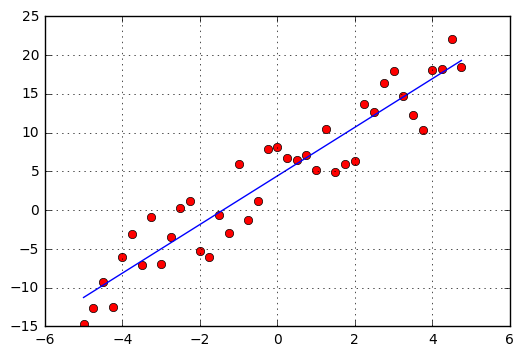

In [16]:
Weight, Bias = train_data(X, real_Y, X, m, eta, Weight, Bias)

predict_Y = X * Weight + Bias

plt.plot(X, real_Y, 'ro')
plt.plot(X, predict_Y)
plt.grid()

print("Weight: " + str(Weight))
print("Bias: " + str(Bias))

The predicted value is very close the the real value. So, we have finished our job for learning algorithm!!!

## Tensorflow

![Tensorflow](https://www.tensorflow.org/_static/images/tensorflow/logo.png)

According to the website: 
TensorFlow™ is an open source software library for numerical computation using data flow graphs. It works similar to numpy but it tends to having the application of deep learning. The way Tensorflow works is that it will define everything before getting compute. We will see this in action.

### Linear regression in Tensorflow.

What? we have to define the gradient again? Actuall there is a method to help us with learning.

200.658
37.9181
9.41982
4.41738
3.5295
3.36393
3.32662
3.31327
3.30535
3.2994
3.29462
3.29073
3.28754
3.28494
3.28281
3.28106
3.27964
3.27847
3.27751
3.27673
3.27609
3.27557
3.27514
3.27479
3.2745
3.27427
3.27408
3.27392
3.27379
3.27369
Weight: 2.95417
Bias: 3.59825


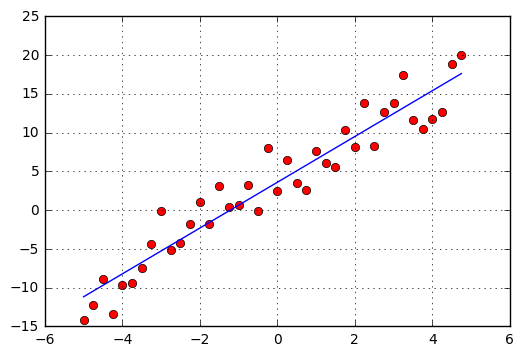

In [17]:
# Import the libary
import tensorflow as tf

def output(input_graph):
    # This is the normal output of the graph.
    normal_out = 3*input_graph + 4
    # Adding noise to it by adding or subtracting by random number
    return normal_out + random.uniform(-5, 5)

# the real dataset
X = np.arange(-5, 5, 0.25)
Y = np.array(list(map(output, X)))

# We are going to pass this value when we actually train the neuron.
real_x = tf.placeholder(tf.float32)
real_y = tf.placeholder(tf.float32)

# Define weight and bias

Weight = tf.Variable(random.uniform(-10, 10))
Bias = tf.Variable(random.uniform(-10, 10))

# Same as the numpy version.
predict_y = tf.add(tf.mul(Weight, real_x), Bias)

# Find the difference
diff = predict_y - real_y

# get number of train sets
m = len(X)

# Loss function
loss = tf.reduce_sum(diff ** 2) / (m * 2)

# Learning rate is 0.01
training  = tf.train.GradientDescentOptimizer(0.01).minimize(loss)

# Create session for tensorflow 
sess = tf.Session()

start = tf.global_variables_initializer()

# Initialize all the variables
sess.run(start)

for i in range(300):
    # This is where we are going to feed the train data
    data_train = {real_y: Y, real_x: X}
    
    # Run training
    sess.run(training, feed_dict=data_train)
    
    cost = sess.run(loss, feed_dict=data_train)
    
    if i%10 == 0:
        print(cost)
        
print("Weight: " + str(sess.run(Weight)))
print("Bias: " + str(sess.run(Bias)))

plot_y = sess.run(predict_y, {real_x : X})

plt.plot(X, Y, 'ro')
plt.plot(X, plot_y)
plt.grid()

# We have to close the session
sess.close()

The code is much shorter.